# TEST 2
Koristeći jupyter lab, kompletirati definirane zadatake u nastavku!<br>
Kompajlirani jupyter notebook uploadovati kao rješenje zadatka.

----------
#### ZADATAK 1: 
Preuzeti fotografiju koristeći link:
https://source.unsplash.com/random/1000×1000/?smile-happy
<br>Snimiti fotografiju pod nazivom fotografija1

----------
#### ZADATAK 2:
Import uobičajnih biblioteka koje nam trebaju za kreiranje rješenja.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

----------
#### ZADATAK 3:
Učitati snimljenu fotografiju.

In [2]:
img = cv2.imread("fotografija1.jpg")
img2 = img.copy()

----------
#### ZADATAK 4:
Kreirati funkciju koja će prikazati sliku u većoj rezoluciji i ispravnim kolor mapiranjem za matplotlib.
Prikazati fotografiju koristeći novokreiranu funkciju.

In [3]:
def display(img, imgType="rgb"):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    if imgType == "gray":
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)

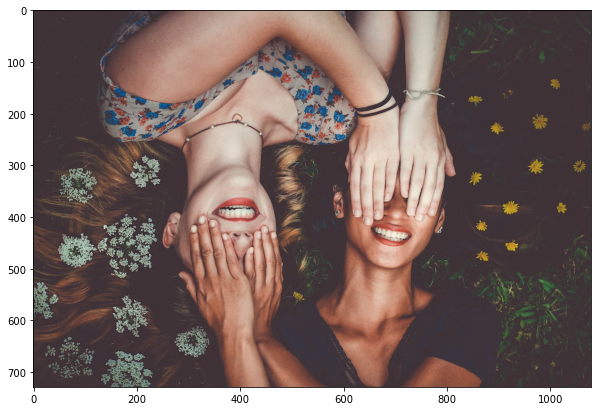

In [4]:
display(img)

----------
#### ZADATAK 5:
Kreirajte funkciju koja uzima sliku i crta narandžasti pravougaonik oko onoga što detektuje da je OSMJEH.
Podesite scaleFactor i minNeighbor parametre da biste dobili dobre rezultate.
Za detekciju koristiti HAAR CASCADES.
XML datoteke preuzeti sa https://github.com/opencv/opencv/tree/master/data/haarcascades
Prikazati rezutujuću sliku.

In [5]:
smile_cascade = cv2.CascadeClassifier("haarcascade_smile.xml")
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [6]:
def detect(img):
    img_copy = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=3)
    for (x,y,w,h) in faces:
        roi = img_copy[y:y+h, x:x+w]
        smiles = smile_cascade.detectMultiScale(roi, scaleFactor=1.2, minNeighbors=3)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(img, (x+sx,y+sy), (x+sx+sw,y+sy+sh), (0,165,255), 5)
    return img

In [7]:
result = detect(img)

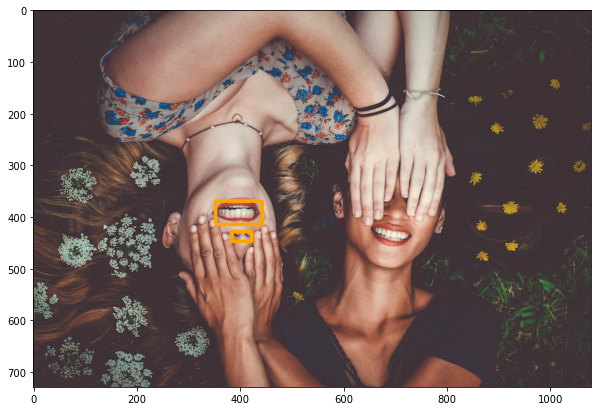

In [8]:
display(result)

----------
#### ZADATAK 6:
Izmjenite funkciju detekcije tako da efektivno zamagljuje otkriveni osmjeh, umjesto da samo nacrta pravougaonik oko njega.
Prikazati rezultujuću fotografiju.

In [12]:
def detect_and_blur(img2):
    img_copy = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=3)
    for (x,y,w,h) in faces:
        roi = img_copy[y:y+h, x:x+w]
        smiles = smile_cascade.detectMultiScale(roi, scaleFactor=1.2, minNeighbors=3)
        for (sx, sy, sw, sh) in smiles:
            roi = img2[y+sy:y+sy+sh, x+sx:x+sx+sw]
            blurred_roi = cv2.medianBlur(roi, 25)
            img2[y+sy:y+sy+sh, x+sx:x+sx+sw] = blurred_roi
    return img2

In [13]:
result = detect_and_blur(img2)

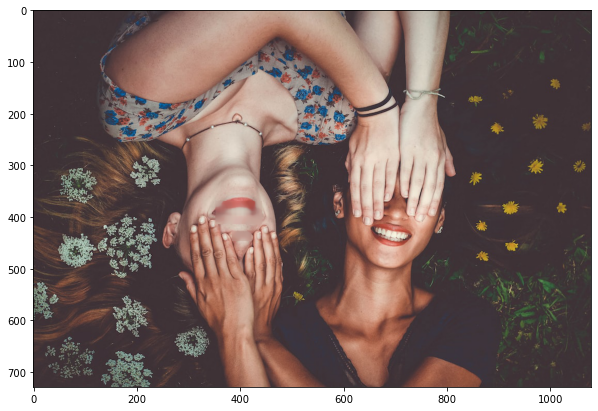

In [14]:
display(result)